This notebook shows how the daily electrical energy consumption estimates were created from the data.


Methods:

- simple resample with no data interpolation (loses any day without a midnight sample)
- interpolate missing samples on a minute basis and take differences.  then sum these each day.  the resample command with asfreq and sum performs these operations.
- TODO: fill message gaps with last good known value in reported off gaps

TODO:

- Devise and execute spot tests for this data and analysis
- How do we include the on/off messages in these estimates?  (exclude jumps?)
- it looks like we are underreporting zero days without on/off interpolation.  those days are getting NaN values.

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import WP19_analysis as wpa

for rfd in wpa.raw_file_data[2:]:
    vname = rfd['village_name']
    energy_data = wpa.load_timeseries_file(vname + '-clean.csv')
    resampled = energy_data['kWh export'].resample('D').asfreq().diff()
    print(vname, resampled.mean())

atamali 17.3544303797
ayapo 98.2804878049
kensio 12.8


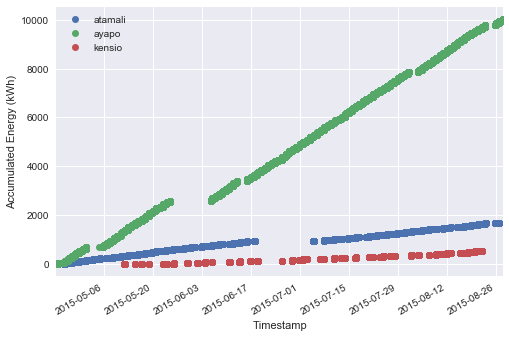

In [3]:
fig, ax = plt.subplots()
for rfd in wpa.raw_file_data[2:]:
    vname = rfd['village_name']
    energy_data = wpa.load_timeseries_file(vname + '-clean.csv')
    energy_data['kWh export'].plot(ax=ax, label=vname, marker='o', linestyle='')
    #print(vname, resampled.mean())
    
ax.set_ylabel('Accumulated Energy (kWh)')
plt.legend()
plt.show()

In [4]:
# count number of samples before resample (with and without NaN)
# count number of samples after resample (with and without Nan)

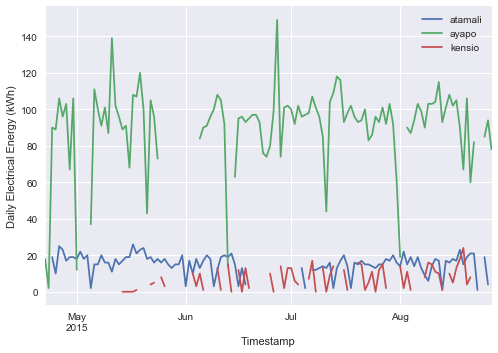

In [5]:
# show result of the resample

fig, ax = plt.subplots()
for rfd in wpa.raw_file_data[2:]:
    vname = rfd['village_name']
    energy_data = wpa.load_timeseries_file(vname + '-clean.csv')
    resampled = energy_data['kWh export'].resample('T').asfreq().diff()
    resampled = resampled.resample('D').sum()
    resampled.plot(ax=ax, label=vname)

ax.set_ylabel('Daily Electrical Energy (kWh)')
plt.legend()
plt.show()

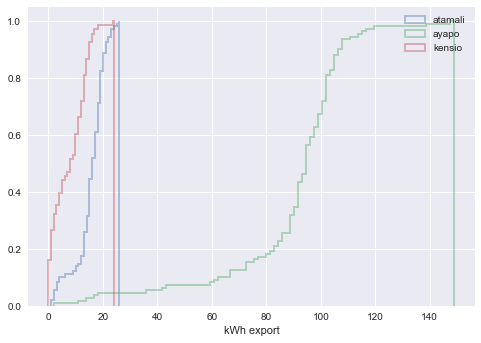

In [6]:
# cumulative distribution function

fig, ax = plt.subplots()
for rfd in wpa.raw_file_data[2:5]:
    vname = rfd['village_name']
    energy_data = wpa.load_timeseries_file(vname + '-clean.csv')
    resampled = energy_data['kWh export'].resample('T').asfreq().diff()
    resampled = resampled.resample('D').sum()
    resampled = resampled.dropna()
    sns.distplot(resampled, 
                 hist_kws={'cumulative':True,
                           'histtype':'step',
                           'linewidth':2},
                kde=False,
                norm_hist=True,
                bins=100,
                label=vname,
                ax=ax)    
    
plt.legend()
plt.savefig('../plots/daily_energy_CDF.png')
plt.show()

In [7]:
# table of descriptive statistics?